# Building Hybrid Intrusion Detection System

Building a hybrid intrusion detection system involves combining the strengths of both machine learning and deep learning algorithms to improve accuracy and robustness. Here's an optimal combination of algorithms for a hybrid intrusion detection system:

1. **Random Forest (Machine Learning)**: Random Forest is a robust ensemble algorithm that can handle complex relationships in data and capture interactions between features. It's a good choice for the machine learning component of the hybrid system due to its ability to handle a wide range of data types and feature interactions.

2. **XGBoost (Machine Learning)**: XGBoost is an advanced gradient boosting algorithm that excels in capturing complex nonlinear relationships and feature interactions. It's efficient and often produces strong results, making it suitable for the machine learning part of the hybrid system.

3. **Convolutional Neural Network (Deep Learning)**: `CNNs` are powerful for capturing spatial patterns in data, such as images or sequential data. In the context of intrusion detection, you might consider using a `CNN` to analyze network traffic data represented as sequences of packets.

4. **Recurrent Neural Network (Deep Learning)**: `RNNs` are well-suited for analyzing sequential data and detecting patterns over time. In intrusion detection, `RNNs` could be used to model the temporal patterns of network traffic or user behavior.

5. **Autoencoders (Deep Learning)**: Autoencoders can be used for anomaly detection by reconstructing input data and identifying deviations from normal patterns. They can be particularly useful for detecting novel attacks that might not be covered by predefined attack patterns.

6. **Ensemble Models (Combination)**: Combining the predictions of multiple models can lead to improved performance. You can create an ensemble by aggregating the outputs of different algorithms, such as Random Forest, XGBoost, and various neural networks.

> An optimal combination of algorithms will depend on your specific dataset, the nature of the intrusion detection problem, and the computational resources available. It's essential to experiment with different algorithms, tune hyperparameters, and validate the performance on relevant evaluation metrics.

> A hybrid approach should not only focus on combining algorithms but also consider data preprocessing, feature engineering, and proper integration of the individual models to create a cohesive and effective intrusion detection system.

| Feature                  | Description                                                                                          |
|--------------------------|------------------------------------------------------------------------------------------------------|
| Duration                 | The duration of the connection.                                                                      |
| Protocol_Type            | The protocol used in the connection (e.g., TCP, UDP, ICMP).                                          |
| Service                  | The type of service being accessed (e.g., http, ftp, smtp).                                          |
| Flag                     | Flags used in the connection establishment, termination, and data transfer.                          |
| Src_bytes                | The number of data bytes sent from the source to the destination.                                    |
| Dst_bytes                | The number of data bytes sent from the destination to the source.                                    |
| Land                     | A binary column indicating whether the connection is from/to the same host/port (land attack).       |
| Wrong_fragment           | The number of wrong fragments in the connection.                                                     |
| Urgent                   | The number of urgent packets in the connection.                                                      |
| Hot                      | A binary column indicating whether the connection has a "hot" indicator.                             |
| Num_failed_logins        | The number of failed login attempts.                                                                 |
| Logged_in                | A binary column indicating whether the user is logged in.                                            |
| Num_compromised          | The number of compromised conditions.                                                                |
| Root_shell               | A binary column indicating whether a root shell was obtained.                                        |
| Su_attempted             | A binary column indicating whether there was an attempt to escalate privileges using the su command. |
| Num_root                 | The number of root accesses.                                                                         |
| Num_file_creations       | The number of file creation operations.                                                              |
| Num_shells               | The number of shell prompts.                                                                         |
| Num_access_files         | The number of operations on access control files.                                                    |
| Num_outbound_cmds        | The number of outbound commands in an ftp session.                                                   |
| Is_host_login            | A binary column indicating whether the login belongs to a host login session.                        |
| Is_guest_login           | A binary column indicating whether the login is a guest login.                                       |
| Count                    | The number of connections to the same host as the current connection in the past two seconds.        |
| Srv_count                | The number of connections to the same service as the current connection in the past two seconds.     |
| Serror_rate              | The percentage of connections that have "SYN" errors.                                                |
| Srv_serror_rate          | The percentage of connections to the same service that have "SYN" errors.                            |
| Rerror_rate              | The percentage of connections that have "REJ" errors.                                                |
| Srv_rerror_rate          | The percentage of connections to the same service that have "REJ" errors.                            |
| Same_srv_rate            | The percentage of connections to the same service.                                                   |
| Diff_srv_rate            | The percentage of connections to different services.                                                 |
| Srv_diff_host_rate       | The percentage of connections to different hosts for the same service.                               |
| Dst_host_count           | The number of connections to the same destination host in the past two seconds.                      |
| Dst_host_srv_count       | The number of connections to the same destination service in the past two seconds.                   |
| Dst_host_same_srv_rate   | The percentage of connections to the same destination service.                                       |
| Dst_host_diff_srv_rate   | The percentage of connections to different destination services.                                     |
| dst_host_serror_rate     | The percentage of SYN errors among the connections to the same destination host.                     |
| dst_host_srv_serror_rate | The percentage of SYN errors among the connections to the same destination service                   |
| dst_host_rerror_rate     | The percentage of REJ (reject) errors among the connections to the same destination host.            |
| dst_host_srv_rerror_rate | The percentage of REJ (reject) errors among the connections to the same destination service.         |
| outcome                  | It represents the classification of the connection as either normal or attack.                       |

The objective of the model is to predict whether a packet is `attack` or 'normal'. Thus, the target variable would be the column 'outcome'. 

# Import Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset

In [2]:
# Load the dataset
url = "https://ceclnx01.cec.miamioh.edu/~althoua/KDDTrain+.txt"

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

# Add column names to the data and create a new dataframe
data = pd.read_csv(url, header=None, names=columns)

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Display few rows
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# Exploratory Data Analysis (EDA)

In [3]:
# Drop 'level' column as it seems to be causing issues
data = data.drop('level', axis=1)

# Calculate the connection rate per unit of time for each unique service combination
data['connection_rate'] = data.groupby('service')['count'].transform(lambda x: x / x.sum())

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #
# # Retrieve the categorical data items
# categorical_data_items = data.select_dtypes(include=['category', 'object'])

# # Retrieve the column names
# categorical_columns = categorical_data_items.columns.tolist()

# print(categorical_columns)                  # This prints ['protocol_type', 'service', 'flag', 'outcome']. We will exclude 'outcome' when encoding in the next step because 'outcome' is the target variable
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #

# List of columns containing categorical data
categorical_columns = ['protocol_type', 'service', 'flag']                  

# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Convert the 'outcome' column values to binary: 'normal' -> 0, other values -> 1
data['outcome'] = np.where(data['outcome'] == 'normal', 0, 1)

# Feature Extraction

Here are a potential extracted features:

1. **Connection Rate:**
Calculate the rate of connections per unit of time for each unique service combination. This can provide insights into the behavior of specific services.

2. **Ratio Features:**
Create features that capture ratios by dividing `src_bytes` `by dst_bytes`. This could indicate the data transfer direction.

3. **Error Rate Variations:**
Create features that capture the variation in error rates, like the difference between `serror_rate` and `srv_serror_rate`. This could highlight suspicious patterns.

4. **Connection Density:**
Calculate the density of connections by dividing `count` by the `duration`. This can help identify bursts of activity or unusually high connection rates.

5. **Interaction with Login Events:**
Incorporate features related to `num_failed_logins`, `num_compromised`, and`logged_in`, to capture interactions between connection behavior and potential attacks.

6. **Feature Crosses:**
Create interactions between relevant features. For example, multiplying `count` with `same_srv_rate` could give insights into the frequency of interactions with the same service.

7. **Error Rate Averages:**
Calculate the average of `dst_host_serror_rate` and `dst_host_srv_serror_rate` to get an overall picture of the error rate behavior for each connection. This might help capture connections that consistently have high error rates.

8. **Error Rate Differences:**
Calculate the difference between `dst_host_serror_rate` and `dst_host_srv_serror_rate`. _A higher difference could indicate that the error rates are significantly different for connections to the same host versus the same service_.

9. **Error Rate Thresholding:**
Create binary features based on whether `dst_host_serror_rate` or `dst_host_srv_serror_rate` exceeds a certain threshold. This can help identify connections with exceptionally high error rates.

10. **Combined Error Rate:**
Sum or average `dst_host_serror_rate` and `dst_host_rerror_rate` to create a feature that considers both **SYN** and **REJ** errors together. This might capture connections with various types of errors.

11. **Error Rate Variability:**
Calculate the standard deviation of `dst_host_serror_rate` and `dst_host_srv_serror_rate`. _High variability could indicate inconsistent error rate behaviors_.

12. **Error Rate Interaction with Other Features:**
Create interaction features by multiplying `dst_host_serror_rate` with other features like `count` or `same_srv_rate`. This can capture the relationship between error rates and other connection attributes.

### Notes:
* `dst_host_serror_rate`: represents the percentage of SYN errors among the connections to the same destination host. SYN errors occur during the TCP three-way handshake process when a request for a connection is not acknowledged properly. A high value of this feature could indicate a higher rate of failed connections to the destination host due to SYN errors.
* `dst_host_srv_serror_rate`: represents the percentage of SYN errors among the connections to the same destination service instead of the host. It represents the percentage of SYN errors among the connections to the same destination service. A high value here could indicate a higher rate of SYN errors for a particular service on the destination. 
* `dst_host_rerror_rate`: represents the percentage of REJ (reject) errors among the connections to the same destination host. REJ errors occur when a connection request is explicitly rejected. A high value of this feature might suggest a higher rate of rejected connections to the destination host. 
* `dst_host_srv_rerror_rate`: represents the percentage of REJ (reject) errors among the connections to the same destination service. It represents the percentage of REJ errors among the connections to the same destination service. A high value could indicate a higher rate of rejected connections for a specific service on the destination.
* `outcome`: represents the classification of the connection as either normal or belonging to a specific type of attack. The possible outcomes include various attack types like DoS (Denial of Service), Probe, R2L (Unauthorized access from a remote machine), and U2R (Unauthorized access to local superuser privileges), as well as 'normal'.

In [4]:
# Calculate data transfer ratio and error rate ratio
data_encoded['data_transfer_ratio'] = data_encoded['src_bytes'] / data_encoded['dst_bytes'].replace(0, 1e-10)               # To avoid NaN result
data_encoded['error_rate_ratio'] = data_encoded['serror_rate'] / data_encoded['rerror_rate'].replace(0, 1e-10)              # To avoid NaN result

In [5]:
# Calculate the variation in error rates
data_encoded['error_rate_variation'] = data_encoded['serror_rate'] - data_encoded['srv_serror_rate']

In [6]:
# Calculate the density of connections by dividing count by duration
data_encoded['connection_density'] = data_encoded['count'] / data_encoded['duration'].replace(0, 1e-10)

In [7]:
# Create interaction feature between num_failed_logins and logged_in
data_encoded['login_interaction'] = data_encoded['num_failed_logins'] * data_encoded['logged_in']

In [8]:
# Create interaction feature between count and same_srv_rate
data_encoded['interaction_with_same_srv'] = data_encoded['count'] * data_encoded['same_srv_rate']

In [9]:
# Calculate the average of dst_host_serror_rate and dst_host_srv_serror_rate
data_encoded['avg_error_rate'] = (data_encoded['dst_host_serror_rate'] + data_encoded['dst_host_srv_serror_rate']) / 2

In [10]:
# Calculate the difference between dst_host_serror_rate and dst_host_srv_serror_rate
data_encoded['error_rate_difference'] = data_encoded['dst_host_serror_rate'] - data_encoded['dst_host_srv_serror_rate']

In [11]:
# Calculate the combined error rate by summing dst_host_serror_rate and dst_host_rerror_rate
data_encoded['combined_error_rate'] = data_encoded['dst_host_serror_rate'] + data_encoded['dst_host_rerror_rate']

In [12]:
# Calculate the standard deviation of error rates
data_encoded['error_rate_std'] = data_encoded[['dst_host_serror_rate', 'dst_host_srv_serror_rate']].std(axis=1)

In [13]:
# Create interaction feature between dst_host_serror_rate and count
data_encoded['error_rate_interaction'] = data_encoded['dst_host_serror_rate'] * data_encoded['count']

In [62]:
# This code is to find the best threshold for the 'dst_host_serror_rate'
# # Split the data into training and validation sets
# train_data, val_data = train_test_split(data_encoded, test_size=0.2, random_state=42)

# # Calculate ROC curve and AUC for different threshold values
# roc_curves = []
# thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# for threshold in thresholds:
#     val_predictions = (val_data['dst_host_serror_rate'] > threshold) | (val_data['dst_host_srv_serror_rate'] > threshold)
#     roc_auc = roc_auc_score(val_data['outcome'], val_predictions)
#     fpr, tpr, _ = roc_curve(val_data['outcome'], val_predictions)
#     roc_curves.append((fpr, tpr, roc_auc))

# # Find the threshold that maximizes Youden's J statistic
# best_threshold = None
# best_j_statistic = -1
# for i, (fpr, tpr, roc_auc) in enumerate(roc_curves):
#     j_statistic = tpr - fpr
#     best_threshold_idx = np.argmax(j_statistic)
    
#     if j_statistic[best_threshold_idx] > best_j_statistic:
#         best_j_statistic = j_statistic[best_threshold_idx]
#         best_threshold = thresholds[best_threshold_idx]

# print("Best threshold:", best_threshold)

Best threshold: 0.05


In [14]:
# Set a threshold value for error rates
threshold = 0.05                       # Best threshold: 0.05 (calculated in a previous analysis) 
         
# Create a binary column indicating high error rates
data_encoded['high_error_rate'] = (data_encoded['dst_host_serror_rate'] > threshold) | (data_encoded['dst_host_srv_serror_rate'] > threshold)

In [58]:
data_encoded.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,connection_rate,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,data_transfer_ratio,error_rate_ratio,error_rate_variation,connection_density,login_interaction,interaction_with_same_srv,avg_error_rate,error_rate_difference,combined_error_rate,error_rate_std,error_rate_interaction,high_error_rate
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0.000011,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.910000e+12,0.000000e+00,0.0,2.000000e+10,0,2.00,0.00,0.00,0.05,0.000000,0.00,False
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0.000022,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.460000e+12,0.000000e+00,0.0,1.300000e+11,0,1.04,0.00,0.00,0.00,0.000000,0.00,False
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0.000043,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000e+00,1.000000e+10,0.0,1.230000e+12,0,6.15,1.00,0.00,1.00,0.000000,123.00,True
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0.000010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.845578e-02,2.000000e+09,0.0,5.000000e+10,0,5.00,0.02,0.02,0.03,0.014142,0.15,False
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0.000059,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.738095e-01,0.000000e+00,0.0,3.000000e+11,0,30.00,0.00,0.00,0.00,0.000000,0.00,False
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.0

# Normalizing Data

In [15]:
# Drop the 'outcome' from the data_encoded before converting all columns to float ('outcome' is of String class, so it can't be converted to float)
data_encoded = data_encoded.drop(columns=['outcome'])

# Convert integer columns to float columns (uniform all columns)
data_encoded[data_encoded.columns] = data_encoded[data_encoded.columns].astype(float)

# Normalize the data columns
scaler = MinMaxScaler()
data_encoded[data_encoded.columns] = scaler.fit_transform(data_encoded)

# Split Data

In [16]:
# Split the data into features (X) and target (y)
X = data_encoded
y = data['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model (XGBoost)

xgb_cv.best_score_  =  0.9943445222643408
xgb_cv.best_params_ =  {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 300}
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13422
           1       1.00      0.99      0.99     11773

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195



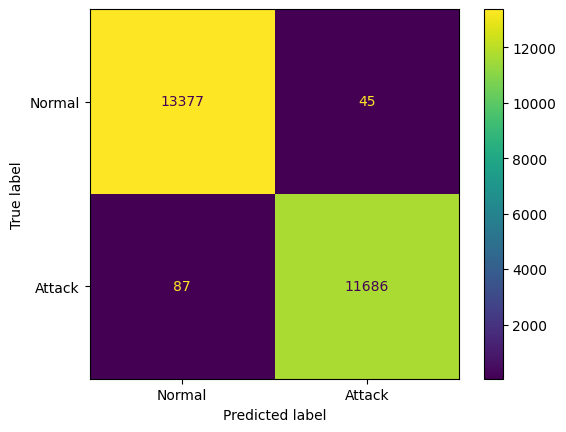

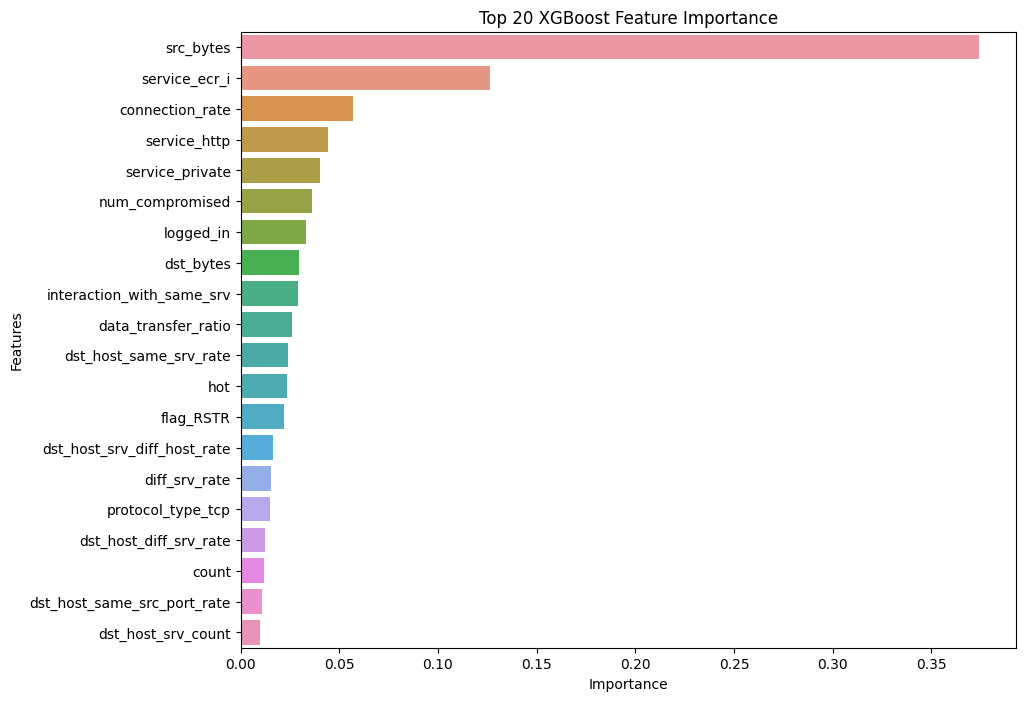

In [18]:
# Train XGBoost model
xgb_model = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4],                                     # Tried 'max_depth': [4,8,12]
             'min_child_weight': [3],                              # Tried 'min_child_weight': [3, 5]
             'learning_rate': [0.01],                              # 'learning_rate': [0.01, 0.1]
             'n_estimators': [300]                                 # 'n_estimators': [300, 500]
             }

# Define the scoring metrics as a list of strings
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb_model, cv_params, scoring=scoring_metrics, cv=5, refit='recall')

# Fit the training data into the xgb_cv model
xgb_cv.fit(X_train, y_train)

# Examine the best recall score
print("xgb_cv.best_score_  = ", xgb_cv.best_score_)                       # 1.0

# Examine the best parameters
print("xgb_cv.best_params_ = ", xgb_cv.best_params_)                      # {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 300}

# Performance Evaluation
xgb_cv_preds = xgb_cv.predict(X_test)

# Confusion Matrix and Classification Report
xgb_cv_cm = confusion_matrix(y_test, xgb_cv_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cv_cm, display_labels=['Normal', 'Attack'])
disp.plot()

# Create XGBoost Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_cv_preds))                                 

# Create a DataFrame to store feature importances
xgb_cv_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_cv.best_estimator_.feature_importances_})

# Get the top 20 features with highest importance
top_features = xgb_cv_feature_importance_df.nlargest(20, 'Importance')

# Plot the top 10 important features using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title("Top 20 XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# RNN Model

In [68]:
# Range of output_dim values to experiment with
output_dim_values = [50, 100, 150, 200, 250, 300]

# Iterate through different output_dim values and evaluate the model
best_output_dim = None
best_accuracy = 0

for output_dim in output_dim_values:
    model = Sequential()

    # Add Dense layers
    model.add(Dense(units=output_dim, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(units=output_dim, activation='relu'))
    model.add(Dense(units=output_dim, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compile and train the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=64)

    # Evaluate the model on the validation set or test set
    lstm_preds = model.predict(X_test)
    lstm_preds = (lstm_preds > 0.5).astype(int)
    accuracy = accuracy_score(y_test, lstm_preds)
    
    if accuracy > best_accuracy:
        # Store Confusion Matrix
        lstm_cm = confusion_matrix(y_test, lstm_preds)
        
        # Update the best_accuracy score
        best_accuracy = accuracy
        best_output_dim = output_dim

print("Best Output Dimension:", best_output_dim)

Epoch 1/10
1575/1575 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9781
Epoch 2/10
1575/1575 [==============================] - 4s 2ms/step - loss: 0.0261 - accuracy: 0.9908
Epoch 3/10
1575/1575 [==============================] - 4s 2ms/step - loss: 0.0197 - accuracy: 0.9930
Epoch 4/10
1575/1575 [==============================] - 4s 2ms/step - loss: 0.0161 - accuracy: 0.9943
Epoch 5/10
1575/1575 [==============================] - 4s 2ms/step - loss: 0.0143 - accuracy: 0.9949
Epoch 6/10
1575/1575 [==============================] - 4s 2ms/step - loss: 0.0135 - accuracy: 0.9951
Epoch 7/10
1575/1575 [==============================] - 4s 2ms/step - loss: 0.0120 - accuracy: 0.9955
Epoch 8/10
1575/1575 [==============================] - 4s 2ms/step - loss: 0.0113 - accuracy: 0.9959
Epoch 9/10
1575/1575 [==============================] - 4s 2ms/step - loss: 0.0107 - accuracy: 0.9959
Epoch 10/10
788/788 [==============================] - 1s 1ms/step
Epoch 1/10
1575

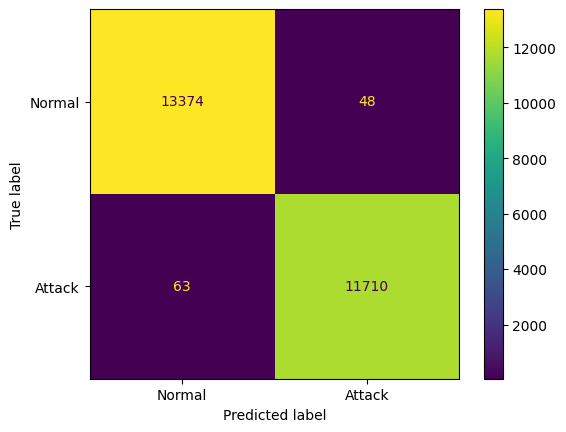

In [89]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=lstm_cm, display_labels=['Normal', 'Attack'])
disp.plot()

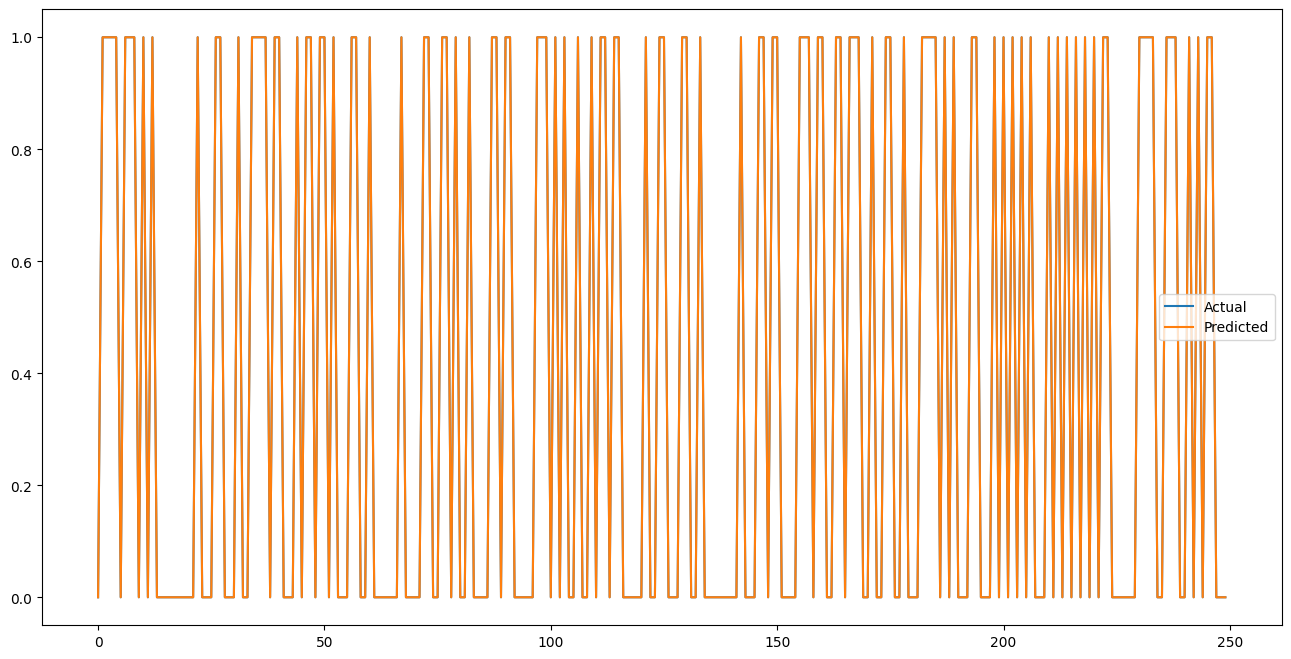

In [95]:
# Display the Model Performance
df = pd.DataFrame({"Y_test": y_test.ravel(), "Y_pred" : lstm_preds.ravel()})
plt.figure(figsize=(16,8))
plt.plot(df[:250])
plt.legend(['Actual' , 'Predicted'])

# Ensemble Fusion

788/788 [==============================] - 2s 2ms/step


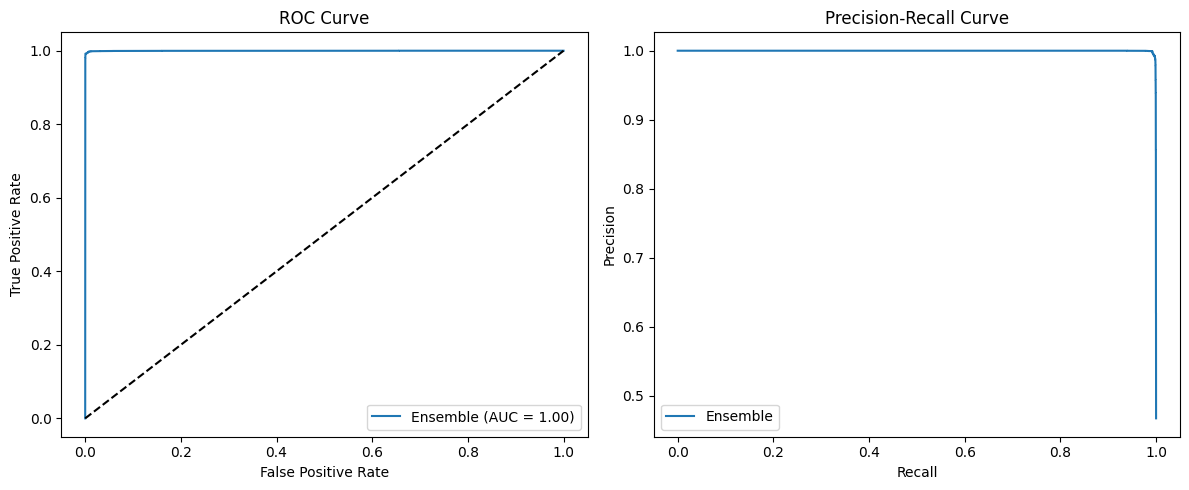

In [97]:
# Get predictions from both models
xgb_predictions = xgb_cv.predict(X_test)
rnn_predictions = model.predict(X_test)

# Ensemble Fusion (Simple Averaging)
ensemble_predictions = (xgb_predictions + rnn_predictions.flatten()) / 2

# Evaluate Ensemble Model
ensemble_predictions_binary = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]
accuracy = accuracy_score(y_test, ensemble_predictions_binary)
precision = precision_score(y_test, ensemble_predictions_binary)
recall = recall_score(y_test, ensemble_predictions_binary)
f1 = f1_score(y_test, ensemble_predictions_binary)
roc_auc = roc_auc_score(y_test, ensemble_predictions)

conf_matrix = confusion_matrix(y_test, ensemble_predictions_binary)
fpr, tpr, _ = roc_curve(y_test, ensemble_predictions)

# Plot ROC Curve and Precision-Recall Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='Ensemble (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

precision, recall, _ = precision_recall_curve(y_test, ensemble_predictions)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Ensemble')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()